In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [12]:
import seaborn as sns

In [3]:
local_map = gpd.read_file('F:\summer internship\dataset\geochem\FME_68185551_1607917942205_6252\GSNSWDataset\MapBlocks.shp')

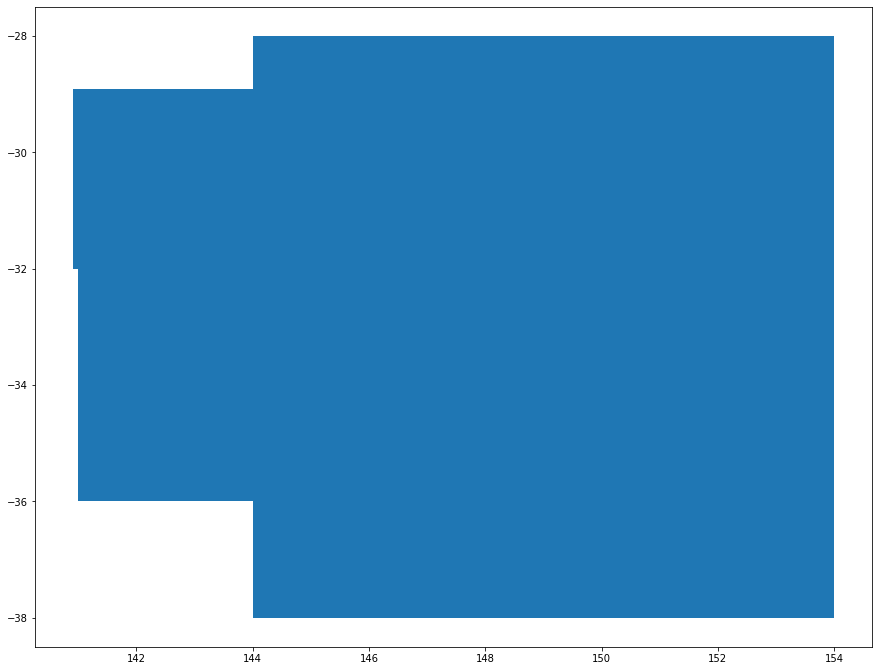

In [4]:
fig,ax = plt.subplots(figsize = (15,15))
local_map.plot(ax=ax)

In [2]:
df = pd.read_csv('F:\summer internship\dataset\geochem\GSNSWDataset\ASSAY_SURFSAMP_AuBasePath.csv')
crs = {'init': 'epsg:4326'}
df.head()

,RPT_ID,RIN,PERIODEND,RPT_TYPE,SAMPLEID,SAMPCODE,FILE_ID,LAT94,LNG94,Ag_ppm,...,Pt_ppm,S_pct,Sb_ppm,Se_ppm,Sn_ppm,Sr_ppm,Te_ppm,Tl_ppm,W_ppm,Zn_ppm
0,26,R00029259,20030821,A,3250,ROCKCHIP,108,-32.162097,141.081325,38.0,...,NaN,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0
1,26,R00029259,20030821,A,3251,ROCKCHIP,108,-32.199129,141.067681,0.0,...,NaN,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0
2,26,R00029259,20030821,A,3252,ROCKCHIP,108,-32.206340,141.039005,0.0,...,NaN,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0
3,26,R00029259,20030821,A,3253,ROCKCHIP,108,-32.206232,141.039218,0.0,...,NaN,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0
4,26,R00029259,20030821,A,3254,ROCKCHIP,108,-32.208333,141.042115,0.0,...,NaN,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0


In [7]:
geometry = [Point(xy) for xy in zip(df["LNG94"], df["LAT94"])]
geometry[:3]

In [9]:
geo_df = gpd.GeoDataFrame(df, crs = crs, geometry = geometry)
geo_df.head()

,RPT_ID,RIN,PERIODEND,RPT_TYPE,SAMPLEID,SAMPCODE,FILE_ID,LAT94,LNG94,Ag_ppm,...,S_pct,Sb_ppm,Se_ppm,Sn_ppm,Sr_ppm,Te_ppm,Tl_ppm,W_ppm,Zn_ppm,geometry
0,26,R00029259,20030821,A,3250,ROCKCHIP,108,-32.162097,141.081325,38.0,...,0.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38.0,POINT (141.08132 -32.16210)
1,26,R00029259,20030821,A,3251,ROCKCHIP,108,-32.199129,141.067681,0.0,...,0.010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,155.0,POINT (141.06768 -32.19913)
2,26,R00029259,20030821,A,3252,ROCKCHIP,108,-32.206340,141.039005,0.0,...,0.045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,170.0,POINT (141.03901 -32.20634)
3,26,R00029259,20030821,A,3253,ROCKCHIP,108,-32.206232,141.039218,0.0,...,0.030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,110.0,POINT (141.03922 -32.20623)
4,26,R00029259,20030821,A,3254,ROCKCHIP,108,-32.208333,141.042115,0.0,...,0.015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,125.0,POINT (141.04212 -32.20833)


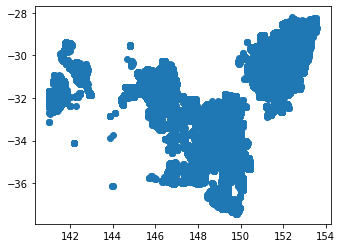

In [10]:
geo_df.plot()

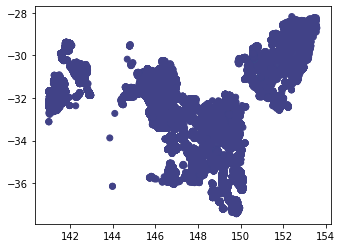

In [11]:
geo_df.plot(column = 'Au_ppm')

In [23]:
pairs_df = df[['Ag_ppm', 'As_ppm', 'Au_ppm', 'Bi_ppm','Co_ppm']]
pairs_df.head()

,Ag_ppm,As_ppm,Au_ppm,Bi_ppm,Co_ppm
0,38.0,4.0,0.200,NaN,15.0
1,0.0,50.0,0.004,NaN,3.0
2,0.0,24.0,0.007,NaN,60.0
3,0.0,48.0,0.008,NaN,120.0
4,0.0,20.0,0.022,NaN,18.0


C:\Users\ANITHA\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\ANITHA\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


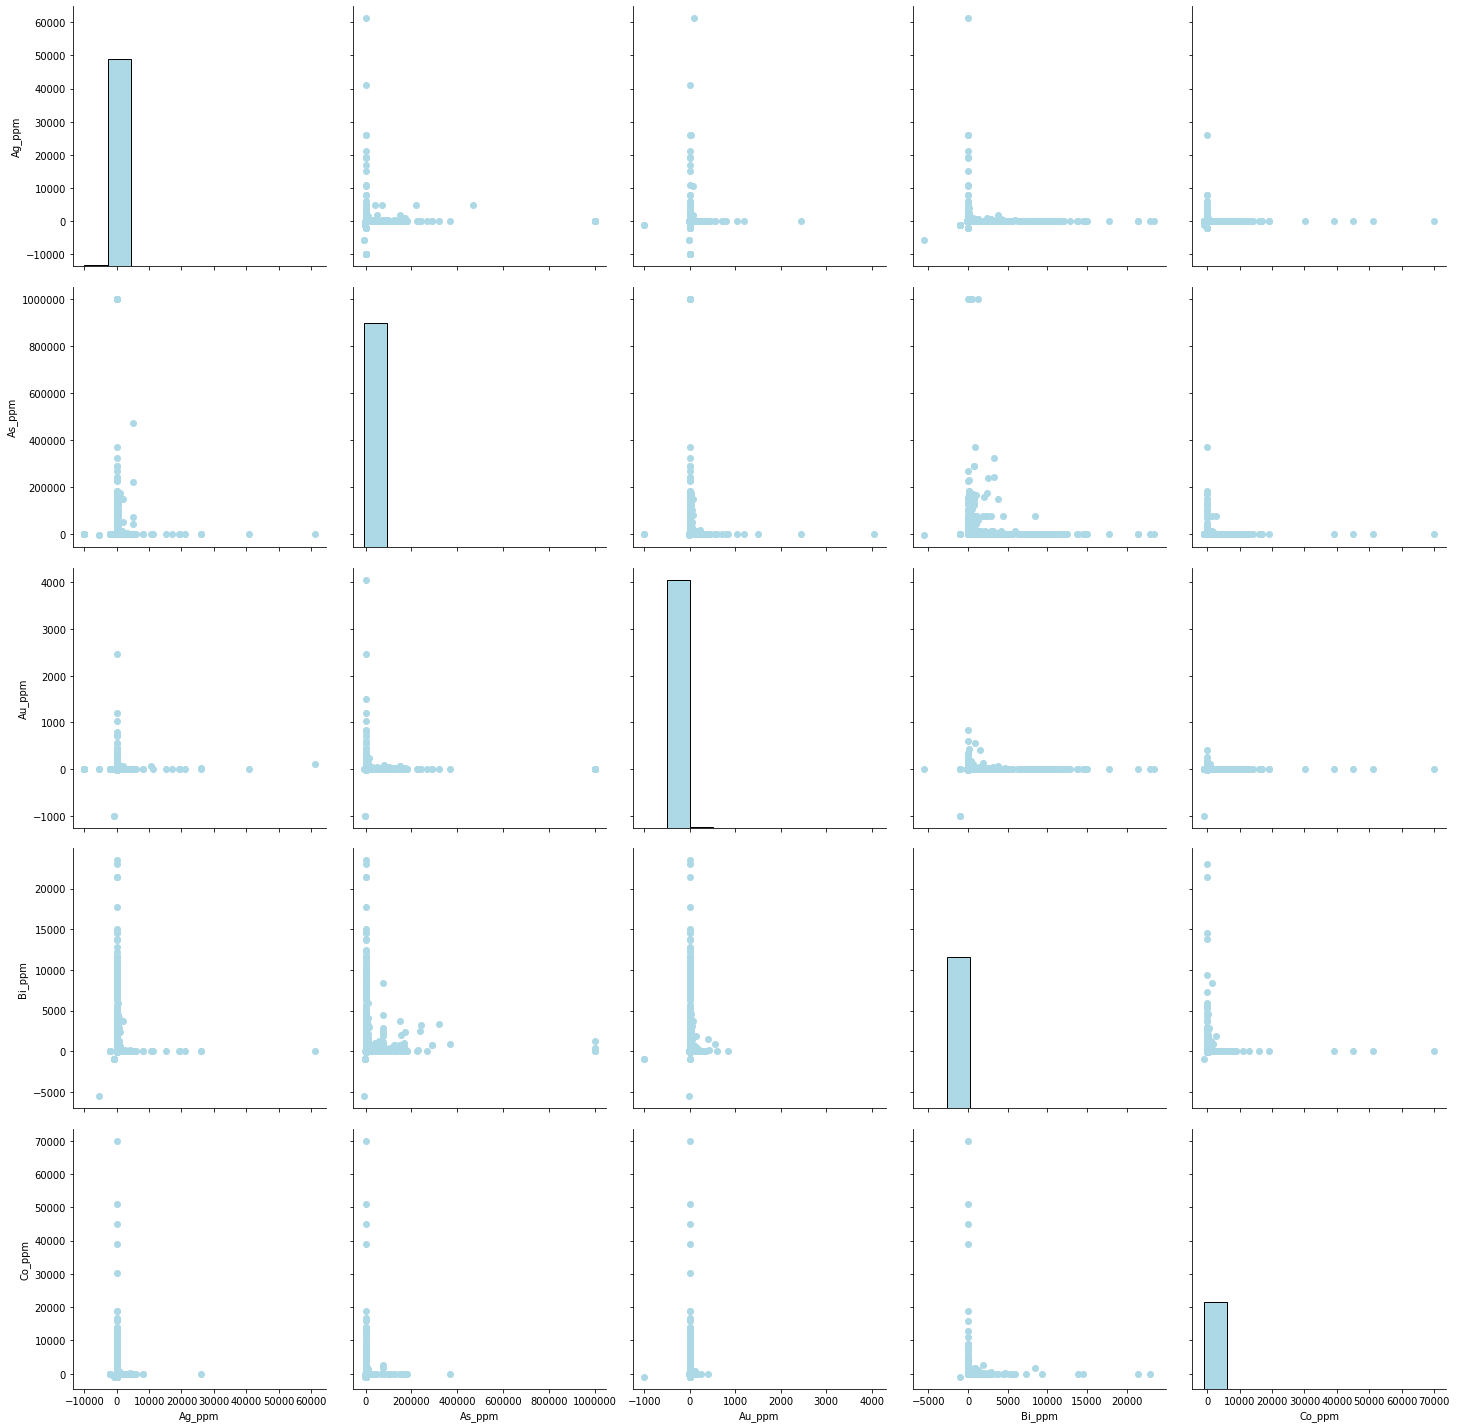

In [25]:
# create customized scatterplot that first filters out NaNs in feature pair
def scatterFilter(x, y, **kwargs):

    interimDf = pd.concat([x, y], axis=1)
    interimDf.columns = ['x', 'y']
    interimDf = interimDf[(~ pd.isnull(interimDf.x)) & (~ pd.isnull(interimDf.y))]

    ax = plt.gca()
    ax = plt.plot(interimDf.x.values, interimDf.y.values, 'o', **kwargs)

# Create an instance of the PairGrid class.
grid = sns.PairGrid(data=pairs_df, vars=list(pairs_df.columns), height = 4)

# Map a scatter plot to the upper triangle
grid = grid.map_upper(scatterFilter, color='lightblue')

# Map a histogram to the diagonal
grid = grid.map_diag(plt.hist, bins=10, edgecolor='k', color='lightblue')

# Map a density plot to the lower triangle
grid = grid.map_lower(scatterFilter, color='lightblue')

In [31]:
df = pd.read_csv('F:\summer internship\dataset\geochem\GSNSWDataset\ASSAY_SURFSAMP_AuBasePath.csv')

In [38]:
df_map = df

In [3]:
import folium

In [7]:
def get_center_latlong(df):
    centerlat = (df['LAT94'].max() + df['LAT94'].min()) / 2
    centerlong = (df['LNG94'].max() + df['LNG94'].min()) / 2
    return centerlat, centerlong

In [ ]:
center = get_center_latlong(df)

m = folium.Map(location=center, zoom_start=10)

print(len(df_map))
for i in range(len(df_map)):
    folium.Circle(
        location=[df_map.iloc[i]['LAT94'], df_map.iloc[i]['LNG94']],
        radius=10,
    ).add_to(m)
    
m

715225
